<a href="https://colab.research.google.com/github/jane95924/week_6_IP/blob/master/week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOCUMENTATION


INTRODUCTION

a) Specifying the question

predict results if Team 1 and Team 2 based on who is home and who is away, and on whether the game is friendly

b) Metric of success

 The model will be considered a success if we are able to predict accurately the outcomes of the game. an accuracy of 80% is good to be able to have an accurate prediction. an RMSE of 10% is good for the variable mean.
 

 c). Context

 You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

 d) Experimental design
 I will carry out the following steps to solve the question
    

*   import libraries, load data, clean the data
*   perform EDA

*   perform any feature engineering
*   check multicolinearity


*   build the model 
*   cross validate the model


*   compute RMSE
*   assess heteroskedacity

*   perform logistic and linear regression
*   make conclusions and challenge the answer














In [1]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns



from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading our fifa_ranking dataset
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')
fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
#loading our results dataset and previewing it
results = pd. read_csv('/content/results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [4]:
#check fifa ranking info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

the columns have the right data types

In [ ]:
#check results dataset info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


all the columns have the appropriate datasets

DATA CLEANING

In [4]:
# check for duplicates and store them in the duplicated dataframe
duplicated = fifa_ranking[fifa_ranking.duplicated()]
duplicated.shape

(37, 16)

In [5]:
# we now drop the duplicates from the fifa_ranking dataset
fifa_ranking.drop_duplicates()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [30]:
#get the shapes of both datasets
print("Fifa Ranking dataset shape:", fifa_ranking.shape)
print("Results dataset shape:", results.shape)

Fifa Ranking dataset shape: (57793, 16)
Results dataset shape: (40839, 9)


fifa_ranking has 57793 rows and 16 columns
whereas results has 40839 rows and 9 columns

In [ ]:
#check for null values
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

we have no null values in the fifa_ranking dataset

In [9]:
#checking for null values un results dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

we have no null values in results dataset

In [6]:
# before we merge, we need a column that is the same in both datasets, country full and home_team are the same
# so i decide to rename it
# changing the full country column name in fifa_ranking dataset to home_team

fifa_ranking = fifa_ranking.rename({'country_full': 'home_team'}, axis = 1)
fifa_ranking.head()

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


Merge the dataset

In [31]:
#merge the two datasets
df_merged = results.merge(fifa_ranking, left_on = ['date', 'home_team'],
                        right_on = ['rank_date', 'home_team'], how = 'inner')
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [32]:
#checking the information on our new dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 956
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     957 non-null    object 
 1   home_team                957 non-null    object 
 2   away_team                957 non-null    object 
 3   home_score               957 non-null    int64  
 4   away_score               957 non-null    int64  
 5   tournament               957 non-null    object 
 6   city                     957 non-null    object 
 7   country                  957 non-null    object 
 8   neutral                  957 non-null    bool   
 9   rank                     957 non-null    int64  
 10  country_abrv             957 non-null    object 
 11  total_points             957 non-null    float64
 12  previous_points          957 non-null    int64  
 13  rank_change              957 non-null    int64  
 14  cur_year_avg             9

some columns  we do not need, so we are going to drop them


In [33]:
# drop the unnecessary columns
df_merged.drop(columns = [ 'country_abrv', 'total_points', 'previous_points', 'rank_change', 
                        'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
                        'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 
                        'three_year_ago_weighted'], axis = 1, inplace = True)

In [34]:
df_merged.drop(columns = ['rank_date'], axis = 1, inplace =True)

In [35]:
#check the shape of our new dataframe
df_merged.shape

(957, 11)

In [36]:
#check for null values in the dataset
df_merged.isnull().sum()

date             0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
rank             0
confederation    0
dtype: int64

we have no null values.


In [37]:
#preview our dataset
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,CAF
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,CONMEBOL


In [38]:
# renaming the rank column home rank.
# since we merged the datasets using the home team
df_merged.rename(columns = {'rank' : 'home_rank'}, inplace = True)

In [39]:
df_merged.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
952    False
953    False
954    False
955    False
956    False
Length: 957, dtype: bool

In [40]:
# now to get the rank of the away team on the day of the match
# we merge our merged dataset again to get the away rank
df1 = df_merged.merge(fifa_ranking, left_on = ['date','home_team'],
                        right_on = ['rank_date','home_team'], how = 'inner')

In [41]:
#we now  rename the rank column to 'away_rank'
df1.rename(columns = {'rank' : 'away_rank'}, inplace = True)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 956
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     957 non-null    object 
 1   home_team                957 non-null    object 
 2   away_team                957 non-null    object 
 3   home_score               957 non-null    int64  
 4   away_score               957 non-null    int64  
 5   tournament               957 non-null    object 
 6   city                     957 non-null    object 
 7   country                  957 non-null    object 
 8   neutral                  957 non-null    bool   
 9   home_rank                957 non-null    int64  
 10  confederation_x          957 non-null    object 
 11  away_rank                957 non-null    int64  
 12  country_abrv             957 non-null    object 
 13  total_points             957 non-null    float64
 14  previous_points          9

our dataset now has 26 columns, some are repeated and we do not need them

In [43]:
# from looking at the shape, we have so many columns, so we get rid of the excess
df2 = df1.drop(columns = ['confederation_x',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation_y' ])

In [44]:
#check the shape and info
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 956
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        957 non-null    object
 1   home_team   957 non-null    object
 2   away_team   957 non-null    object
 3   home_score  957 non-null    int64 
 4   away_score  957 non-null    int64 
 5   tournament  957 non-null    object
 6   city        957 non-null    object
 7   country     957 non-null    object
 8   neutral     957 non-null    bool  
 9   home_rank   957 non-null    int64 
 10  away_rank   957 non-null    int64 
 11  rank_date   957 non-null    object
dtypes: bool(1), int64(4), object(7)
memory usage: 90.7+ KB


In [45]:
#drop the rank date column , it is duplicated
df2.drop(columns= ['rank_date'], axis = 1, inplace = True)

In [46]:
df2.shape

(957, 11)

In [47]:
#preview our dataset
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,59
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,35
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,65
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,67


i woud love to know if the home team won , lost or drew and the same for the away team, decided to create a new column to che the difference in the scores between the teams.

In [48]:
# the difference in the scores 

df2['goal_difference'] = df2['home_score'] - df2['away_score']
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank,goal_difference
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,59,2
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,35,5
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,65,1
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,67,-2


from our new column, we can see the difference, a negative difference means the home lost whereas a positive difference mean the home team won and a zero mean they drew.

In [57]:
# we create a new column to tell if it is a win, lose or draw
df2.loc[df2['home_score'] < df2['away_score'],'game_results'] = 'lose'
df2.loc[df2['home_score'] > df2['away_score'],'game_results'] = 'win'
df2.loc[df2['home_score'] == df2['away_score'],'game_results'] = 'draw'

In [58]:
# preview our dataset
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank,goal_difference,game_results
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,59,2,win
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,0,draw
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,35,5,win
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,65,1,win
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,67,-2,lose


In [51]:
#check for duplicates in our final dataset
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
952    False
953    False
954    False
955    False
956    False
Length: 957, dtype: bool

we have no duplicates

correlation

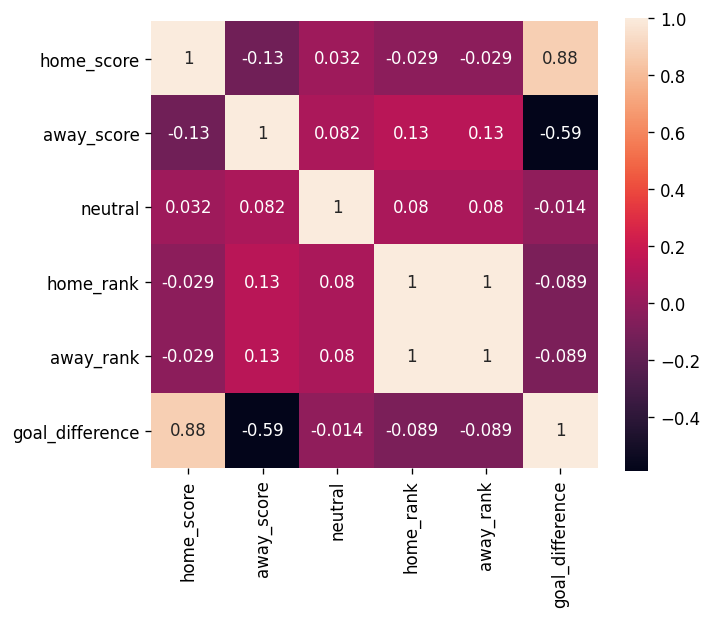

In [59]:
# Correlation 
plt.figure(dpi = 120,figsize= (6,5))
corr = df2.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

from the matrix, we do see that most of the variables are moderately to weakly correlated

the diagonal is 1, as expected.

EXPLORATORY DATA ANALYSIS

In [60]:
# we view the descriptive analysis
df2.describe()

,home_score,away_score,home_rank,away_rank,goal_difference
count,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.665622,1.004180,66.561129,66.561129,0.661442
std,1.938111,1.146207,48.155276,48.155276,2.378492
min,0.000000,0.000000,1.000000,1.000000,-8.000000
25%,0.000000,0.000000,27.000000,27.000000,-1.000000
50%,1.000000,1.000000,59.000000,59.000000,0.000000
75%,2.000000,2.000000,97.000000,97.000000,2.000000
max,31.000000,9.000000,206.000000,206.000000,31.000000


we had a total of 957 score, the home score mean is 1.665622, the away score mean  is 1.004180, the max score was 31 for home score and 9 for away score. we had min score as 0 across

on the goal difference, the min is -8 and max is 31

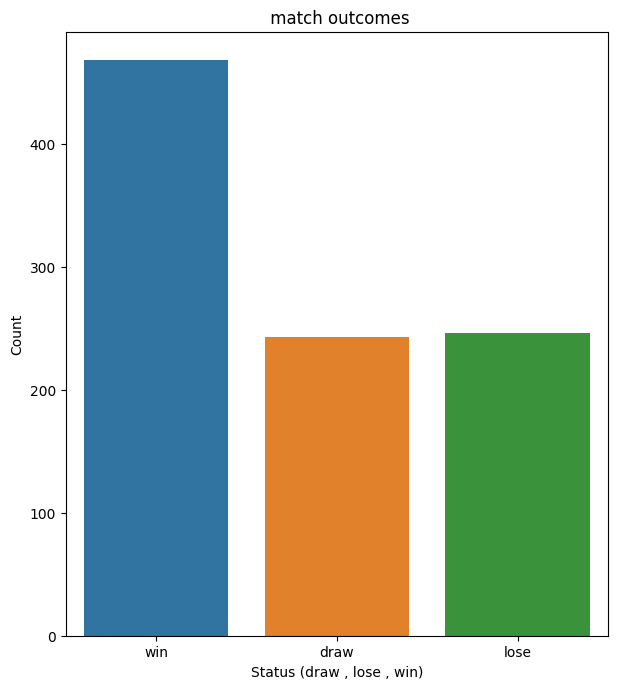

In [61]:
#histogram of the home team match using count
plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(df2['game_results'])
plt.xlabel('Status (draw , lose , win)')
plt.ylabel('Count')
plt.title(' match outcomes')
plt.show()

from the graph, home team won more matches than they did lost. had equal draw and lost matches. it is likely for the home team to win a match than to draw or lost.

False    799
True     158
Name: neutral, dtype: int64


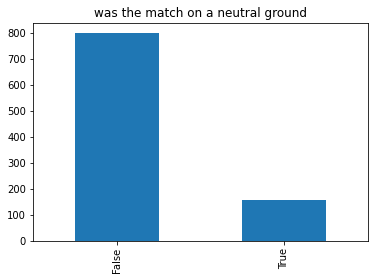

In [62]:
# we want to see if the matches occured on a neutral ground or not
df2.neutral.value_counts().plot(kind = 'bar')
plt.title("was the match on a neutral ground")
print(df2.neutral.value_counts())

from the plot, most  matches were not on neutral grounds, 733 were on non-neutral and only 138 were on neutral grounds

Friendly                                      623
FIFA World Cup qualification                  151
UEFA Euro qualification                        39
AFC Asian Cup qualification                    35
Cyprus International Tournament                 8
AFF Championship                                7
Gulf Cup                                        7
AFC Asian Cup                                   6
CECAFA Cup                                      6
Copa América                                    6
Gold Cup                                        5
CFU Caribbean Cup                               5
African Cup of Nations qualification            5
Windward Islands Tournament                     4
African Cup of Nations                          4
African Nations Championship                    4
SAFF Cup                                        4
Gold Cup qualification                          4
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3


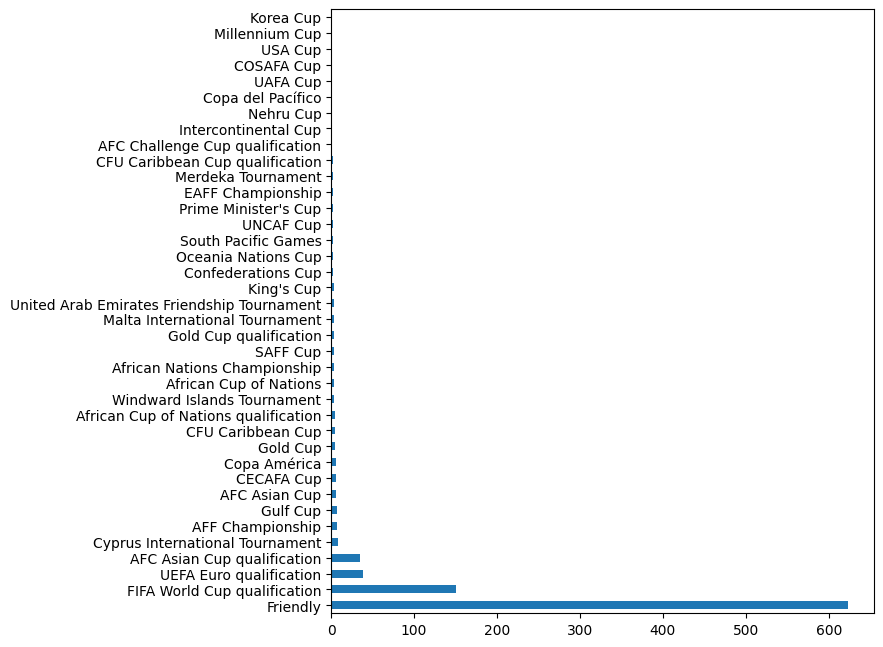

In [63]:
# we check for the tournament types
# let's see the different types of tournaments
plt.figure(figsize = (7,8), dpi = 100)
df2.tournament.value_counts().plot(kind='barh')
print(df2.tournament.value_counts())

from the plot above, most tournaments were friendly with 574, the fifa world cup qualifications had 134 and the other tournaments had significantly small numbers.

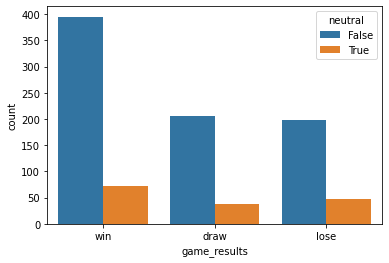

In [64]:
# countplot of the home team results
sns.countplot(x='game_results', data=df2, hue='neutral')

most of the matches were won on unfriendly/ not neutral grounds.

In [65]:
# we drop the columns that we no longer need
df2.drop(columns = ['city', 'country', 'neutral'], inplace = True)

In [66]:
# Encoding the categorical columns 
#

le = LabelEncoder()
df_encoded = df2.apply(le.fit_transform)

In [67]:
df_encoded.tail()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,goal_difference,game_results
952,163,45,38,2,0,17,11,11,10,2
953,163,156,173,3,0,17,13,13,11,2
954,163,119,2,3,0,17,3,3,11,2
955,163,67,64,2,2,17,21,21,8,0
956,163,68,111,1,2,21,96,96,7,1


In [68]:
#check for colinearity
corr = df_encoded.corr()
corr

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,goal_difference,game_results
date,1.000000,0.013666,-0.013760,-0.010266,-0.040333,-0.070075,0.199797,0.199797,0.013030,-0.002399
home_team,0.013666,1.000000,0.035432,0.007441,-0.056736,-0.073295,-0.011383,-0.011383,0.036247,0.003597
away_team,-0.013760,0.035432,1.000000,-0.088295,0.052207,-0.051199,-0.002396,-0.002396,-0.096991,-0.042119
home_score,-0.010266,0.007441,-0.088295,1.000000,-0.139217,-0.034036,-0.036540,-0.036540,0.854413,0.516216
away_score,-0.040333,-0.056736,0.052207,-0.139217,1.000000,0.008062,0.128748,0.128748,-0.633283,-0.226516
tournament,-0.070075,-0.073295,-0.051199,-0.034036,0.008062,1.000000,-0.085439,-0.085439,-0.030743,-0.026535
home_rank,0.199797,-0.011383,-0.002396,-0.036540,0.128748,-0.085439,1.000000,1.000000,-0.096920,-0.074546
away_rank,0.199797,-0.011383,-0.002396,-0.036540,0.128748,-0.085439,1.000000,1.000000,-0.096920,-0.074546
goal_difference,0.013030,0.036247,-0.096991,0.854413,-0.633283,-0.030743,-0.096920,-0.096920,1.000000,0.521758
game_results,-0.002399,0.003597,-0.042119,0.516216,-0.226516,-0.026535,-0.074546,-0.074546,0.521758,1.000000


from the matrix, most variables are weakly correlated, some are moderately corelated.
this is good for modelling, we will get a good prediction.

correlation of 1 along the diagonal makes sense

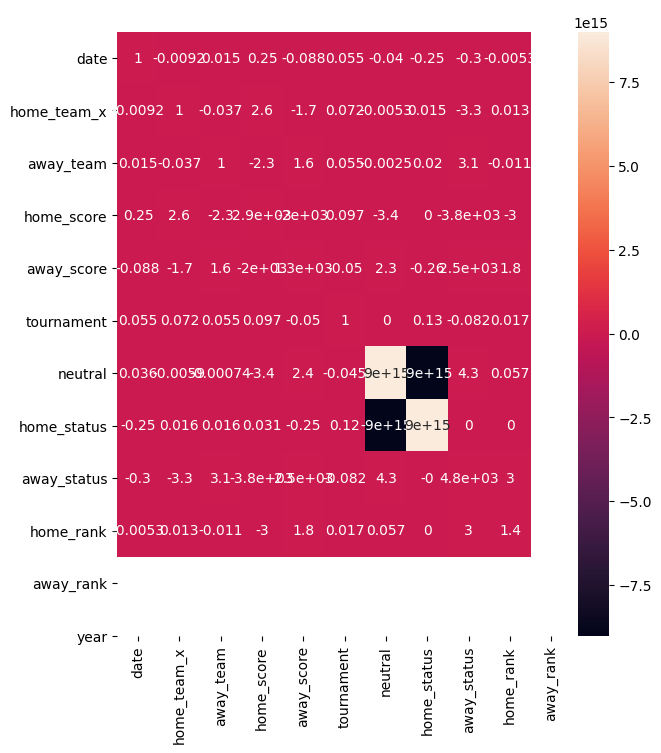

In [42]:
#check for multicolinearity using variance inflation factor
# Plotting a heat map to show the VIF visually.
plt.figure(figsize = (7,8), dpi = 100)
vif = np.linalg.inv(corr.values)
sns.heatmap(vif, annot = True, xticklabels=['date' ,'home_team_x' ,'away_team', 'home_score' , 'away_score','tournament','neutral','home_status','away_status','home_rank' ,'away_rank'], yticklabels=['date' ,'home_team_x' ,'away_team', 'home_score' , 'away_score','tournament','neutral','home_status','away_status','home_rank' ,'away_rank','year'])
plt.title('Variance inflation factor', color = 'white' )
plt.show()

the VIF for each variable is found along the diagonal,they are below 5 which means there is low corelation with the independent variables . we can now build our model.

MODELLING

Approach 1 = Polynomial Regression

model 1 = predict how many goals the home team scores

In [71]:
#splitting the dataset to the variables we need.
X = df2['home_rank'].values.reshape(-1,1)
y = df2['home_score'].values



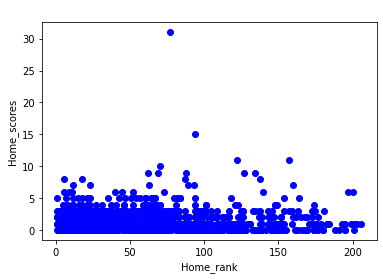

In [72]:
# let us visualise our rank and scores
plt.scatter(X,y, color = 'blue') 
plt.title('Home Performance', color = 'white')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

from what we see, it is likely that the home team scores less than 5,a few cases they would score higher than that. the relation between the home rank and home score is not linear from the look on the scatter plot. a straight line cannot fit across all points, we can apply linear regression.

In [73]:
#getting our training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# fit our linear regression model to our data
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Home_scores')

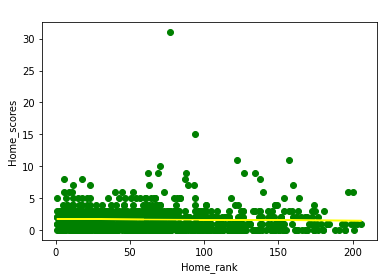

In [74]:
# we visualise our data before we fit it into a polynomial regressor
plt.scatter(X, y, color='green')
plt.plot(X, regressor.predict(X), color='yellow')
plt.title('Home Scores Prediction', color = 'white')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')

from above, we can see that the line of best fit does not pass majority of the points , a polynomial regressor would be an option.  it seem centrally placed but we can not make any conclusions.

In [75]:
#fitting  to our polynomial regressor
# Fitting the polynomial features to the independent variable(x)
# We will start  with a polynomial regression of degree 4

pr = PolynomialFeatures(degree = 4)
X_polyn = pr.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_polyn, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

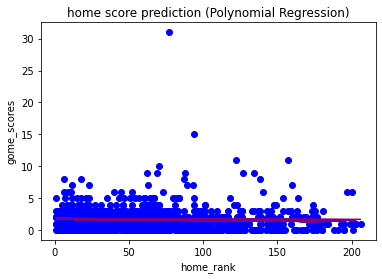

In [76]:
#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_polyn), color='purple')
plt.title('home score prediction (Polynomial Regression)')
plt.xlabel('home_rank')
plt.ylabel('gome_scores')
plt.show()


the line of best fit seem to have split the the points approximately half way.
the line does not pass through each point but we can work with it.

In [77]:
# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3774134921364938
Mean Squared Error: 7.174412624998492
Root Mean Squared Error: 2.678509403567307


In [50]:
# Making predictions using our model
# Predict using linear regression
lin_pred = X_polyn.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

AttributeError: ignored

cross validating model 1

In [78]:
#we use folds to cross validate
folds = KFold(n_splits=5)

In [79]:
# create array to store the RMSE values of each fold
RMSES = []

# create a counter
count = 1

for train_index, test_index in folds.split(X):
    print("\nTraining model " + str(count))
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit a regression model accordingly
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # assess the accuracy of the model
    y_pred = regressor.predict(X_test)
    
    rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse_value)
    
    print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
    count += 1


Training model 1
Model 1 Root Mean Squared Error: 1.6699609561803246

Training model 2
Model 2 Root Mean Squared Error: 2.6615526756261123

Training model 3
Model 3 Root Mean Squared Error: 1.7338769279704407

Training model 4
Model 4 Root Mean Squared Error: 1.458302044498511

Training model 5
Model 5 Root Mean Squared Error: 1.9419717795832108


from what we see above, the only model that is close to our initial RMSE is model 2. the rest of the models have RMSE lower than the initial, model 4 has a great difference, our model may not be very accurate.

In [80]:
#check the mean of the errors
np.mean(RMSES)

1.8931328767717197

the mean of RMSE is smaller than the initial, but the gap in between is not that big.

residual plots and heteroscedasticity

In [82]:
#set prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
home_score_predict = regressor.predict(X_test)


In [96]:
#getting the residual 
residual_score = np.subtract(home_score_predict, y_test)

In [97]:

# let's conduct a Bartlett's test for heteroscedasticity
test_result, p_value = sp.stats.bartlett(home_score_predict, residual_score)

#  compute a critical value of the chi squared distribution
degree_of_freedom = len(home_score_predict) - 1
p_home = 1 - p_value  

critical_value = sp.stats.chi2.ppf(p_home, degree_of_freedom)
print(critical_value)

inf


In [111]:
if (test_result > critical_value):
  print("The variances are heterogeneous. reassess the model.")
else:
  print("The variances are homogeneous. The model passes the test.")

The variances are homogeneous. The model passes the test.


Model 2 ; predict how many goals the away team scores

In [103]:
#splitting the dataset to the variables we need.
Z = df_encoded['away_rank'].values.reshape(-1,1)
t = df_encoded['away_score'].values

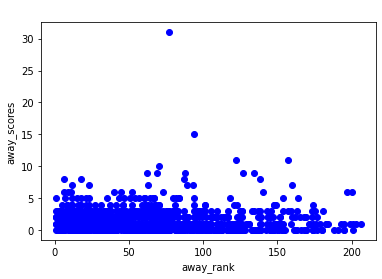

In [101]:
# let us visualise our rank and scores
plt.scatter(X,y, color = 'blue') 
plt.title('away Performance', color = 'white')
plt.xlabel('away_rank')
plt.ylabel('away_scores')
plt.show()

from the scatter plot, the points do not linear.

In [104]:
#getting our training and testing sets
Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size=0.2, random_state=0)
# fit our  model accordingly
regressor1 = LinearRegression()
regressor1.fit(Z_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# assess the accuraccy of the model
t_pred = regressor1.predict(Z_test)

In [68]:
#obtaine the mean errors
print('Mean Absolute Error:', metrics.mean_absolute_error(t_test, t_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(t_test, t_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t_test, t_pred)))

Mean Absolute Error: 0.7850887826069165
Mean Squared Error: 0.9476296044657095
Root Mean Squared Error: 0.9734626877624584


we have initial RMSE of 0.97346268 

cross validating model 2

In [75]:
# create array to store the RMSE values of each fold
RMSES1 = []

# create a counter
count1 = 1

for train_index, test_index in folds.split(Z):
    print("\nTraining model " + str(count1))
    
    Z_train, Z_test = Z[train_index], Z[test_index]
    t_train, t_test = t[train_index], t[test_index]
    
    # fit a regression model accordingly
    regressor1 = LinearRegression()
    regressor1.fit(Z_train, t_train)
    
    # assess the accuracy of the model
    t_pred = regressor1.predict(Z_test)
    
    rmse_value1 = np.sqrt(metrics.mean_squared_error(t_test, t_pred))
    RMSES1.append(rmse_value)
    
    print('Model ' + str(count1) + ' Root Mean Squared Error:',rmse_value1)
    count1 += 1


Training model 1
Model 1 Root Mean Squared Error: 1.091849162144155

Training model 2
Model 2 Root Mean Squared Error: 1.2263322679163244

Training model 3
Model 3 Root Mean Squared Error: 1.2234775626032324

Training model 4
Model 4 Root Mean Squared Error: 1.0417477291226307

Training model 5
Model 5 Root Mean Squared Error: 1.1120271447773755


the RMSE are sligthly higher than the initial RMSE, the difference is small, model 4 is the closest to the initial RMSE.

In [76]:
#mean of the RMSE1
np.mean(RMSES1)

1.9419717795832105

the mean of the RMSE is bigger than the initial mean

heteroscedasticity and residuals

In [105]:
#set prediction
regressor1 = LinearRegression()
regressor1.fit(Z_train, t_train)
away_score_predict = regressor1.predict(Z_test)

In [106]:
#getting the residual
residual_score1 = np.subtract(away_score_predict, t_test)

In [107]:
# let's conduct a Bartlett's test for heteroscedasticity
test_result1, p_value1 = sp.stats.bartlett(away_score_predict, residual_score1)

#  compute a critical value of the chi squared distribution
degree_of_freedom1 = len(away_score_predict) - 1
p_away = 1 - p_value1

critical_value1 = sp.stats.chi2.ppf(p_away, degree_of_freedom1)
print(critical_value1)

inf


In [112]:
if (test_result1 > critical_value1):
  print("The variances are heterogeneous. reassess the model.")
else:
  print("The variances are homogeneous. The model passes the test.")

The variances are homogeneous. The model passes the test.


LOGISTIC REGRESSION

figure out if the home team lost, won or draw.

we already perfomed feature engineering and obtained the goal_results which we are going to use in our prediction.

In [89]:
#we want to predict the score if it is a win, draw or lose. we can drop the other columns
df3 = df_encoded.drop(columns = ['date', 'home_team', 'away_team', 'tournament',
                                         'home_rank', 'away_rank'])
df3.head()

,home_score,away_score,goal_difference,game_results
0,3,1,10,2
1,1,1,8,0
2,5,0,13,2
3,1,0,9,2
4,1,3,6,1


In [90]:
#splitting our data to train and test
P = df3.drop(['game_results'], axis = 1)
q = df3.game_results


P_train, P_test, q_train, q_test = train_test_split(P, q, test_size = .2, random_state=0)

In [91]:
# Fitting our logistic regression  model to our train sets 
LogReg = LogisticRegression()
LogReg.fit(P_train, q_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
#using our model to make predictions
q_pred = LogReg.predict(P_test)

In [94]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(q_test, q_pred)
confusion_matrix

array([[ 51,   0,   0],
       [  0,  41,   0],
       [  0,   0, 100]])

from our confusion matrix, the right predictions would be 51,41 and 100

CONCLUSION

from our prections, our models accurately predicts the scores, when we check the accuracy score, our model could be overfitt, we can try predicting with another  model to compare the outcomes.